# Food Recommedation System

In [1]:
# Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [2]:
# Load the data

data = pd.read_csv('food_survey.csv')

# Data Preprocessing

In [3]:
data.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [4]:
food_type_counts = data['C_Type'].value_counts()
print(food_type_counts)

C_Type
Indian          88
Healthy Food    58
Dessert         53
Chinese         27
Italian         25
Snack           23
Thai            23
French          22
Mexican         21
Japanese        18
Beverage        11
Nepalese        11
Korean           9
Vietnames        9
 Korean          1
Spanish          1
Name: count, dtype: int64


In [5]:
veg_non_counts = data['Veg_Non'].value_counts()
print(veg_non_counts)

Veg_Non
veg        238
non-veg    162
Name: count, dtype: int64


In [6]:
# Split the 'Describe' column by ', ' and explode the list into separate rows
ingredients_df = data.assign(Ingredient=data['Describe'].str.split(', ')).explode('Ingredient')

# Drop the original 'Describe' column as it's no longer needed
ingredients_df = ingredients_df.drop(columns=['Describe'])

ingredients_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3981 entries, 0 to 399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Food_ID     3981 non-null   int64 
 1   Name        3981 non-null   object
 2   C_Type      3981 non-null   object
 3   Veg_Non     3981 non-null   object
 4   Ingredient  3981 non-null   object
dtypes: int64(1), object(4)
memory usage: 186.6+ KB


In [7]:
num_recipes = data['Name'].nunique()
print(f'There are {num_recipes} unique recipes in the data.')

There are 400 unique recipes in the data.


Ingredient
salt                           166
onion                           67
sugar                           56
garlic                          54
oil                             54
                              ... 
sprouts                          1
summer squash,carrot             1
oil,salt                         1
corn tortilla mix,corn,salt      1
ground pepper                    1
Name: count, Length: 1764, dtype: int64


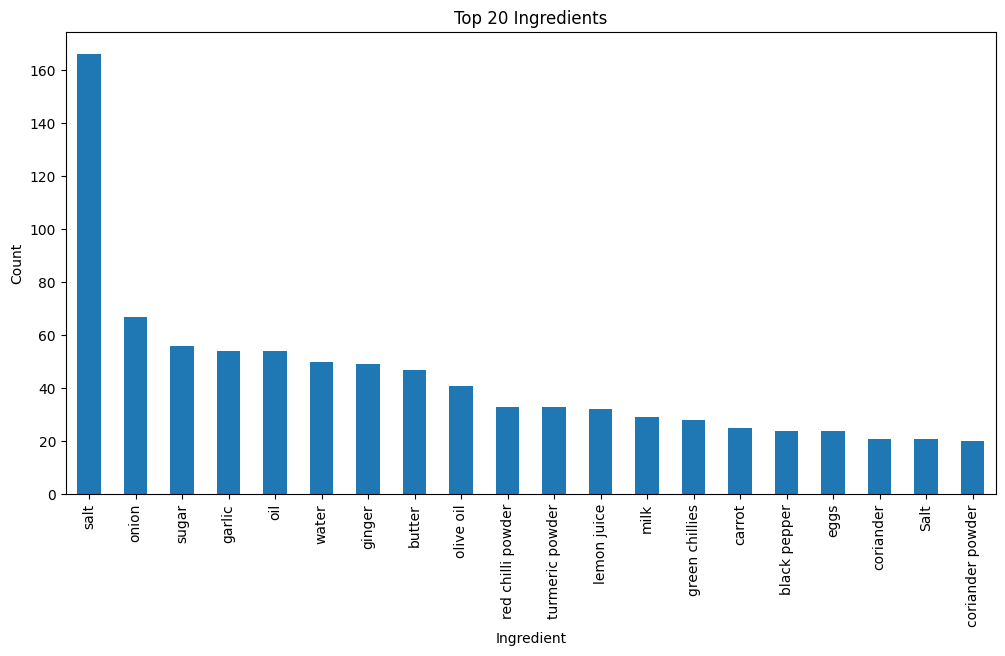

In [8]:
# Count the occurrences of each ingredient
ingredient_counts = ingredients_df['Ingredient'].value_counts()
print(ingredient_counts)
# Plot the top 20 ingredients
ingredient_counts.head(20).plot(kind='bar', figsize=(12, 6), title='Top 20 Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.show()

In [9]:
# Group by Food_ID and count the number of ingredients for each dish
ingredient_counts_per_dish = ingredients_df.groupby('Food_ID').size()

# Find the minimum and maximum number of ingredients in a single dish
min_ingredients = ingredient_counts_per_dish.min()
max_ingredients = ingredient_counts_per_dish.max()

print(f'The minimum number of ingredients in a single dish is {min_ingredients}.')
print(f'The maximum number of ingredients in a single dish is {max_ingredients}.')

The minimum number of ingredients in a single dish is 1.
The maximum number of ingredients in a single dish is 34.


In [10]:
# Get the descriptive statistics for the number of ingredients per dish
ingredient_stats = ingredient_counts_per_dish.describe()

# Extract the required statistics
min_ingredients = ingredient_stats['min']
q1_ingredients = ingredient_stats['25%']
median_ingredients = ingredient_stats['50%']
q3_ingredients = ingredient_stats['75%']
max_ingredients = ingredient_stats['max']

print(f'Minimum number of ingredients per dish: {min_ingredients}')
print(f'First quartile (Q1) of ingredients per dish: {q1_ingredients}')
print(f'Median (Q2) number of ingredients per dish: {median_ingredients}')
print(f'Third quartile (Q3) of ingredients per dish: {q3_ingredients}')
print(f'Maximum number of ingredients per dish: {max_ingredients}')

Minimum number of ingredients per dish: 1.0
First quartile (Q1) of ingredients per dish: 6.0
Median (Q2) number of ingredients per dish: 9.0
Third quartile (Q3) of ingredients per dish: 13.0
Maximum number of ingredients per dish: 34.0


Colaborate Filtter

In [1]:
try:
    import surprise
    print("scikit-surprise is installed.")
except ImportError:
    print("scikit-surprise is not installed.")


scikit-surprise is installed.
